In [1]:
# Explorary Data Analysis 

import pandas as pd
import numpy as np

# Load the data

data = pd.read_csv('creditcard.csv')
data.head()


# change the column class to boolean

data['Class'] = data['Class'].astype(bool)




In [2]:
'''
The data is already clean and does not contain any missing values.'''

# The data contains 10 columns and 1000 rows. The columns are:

data.columns

data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

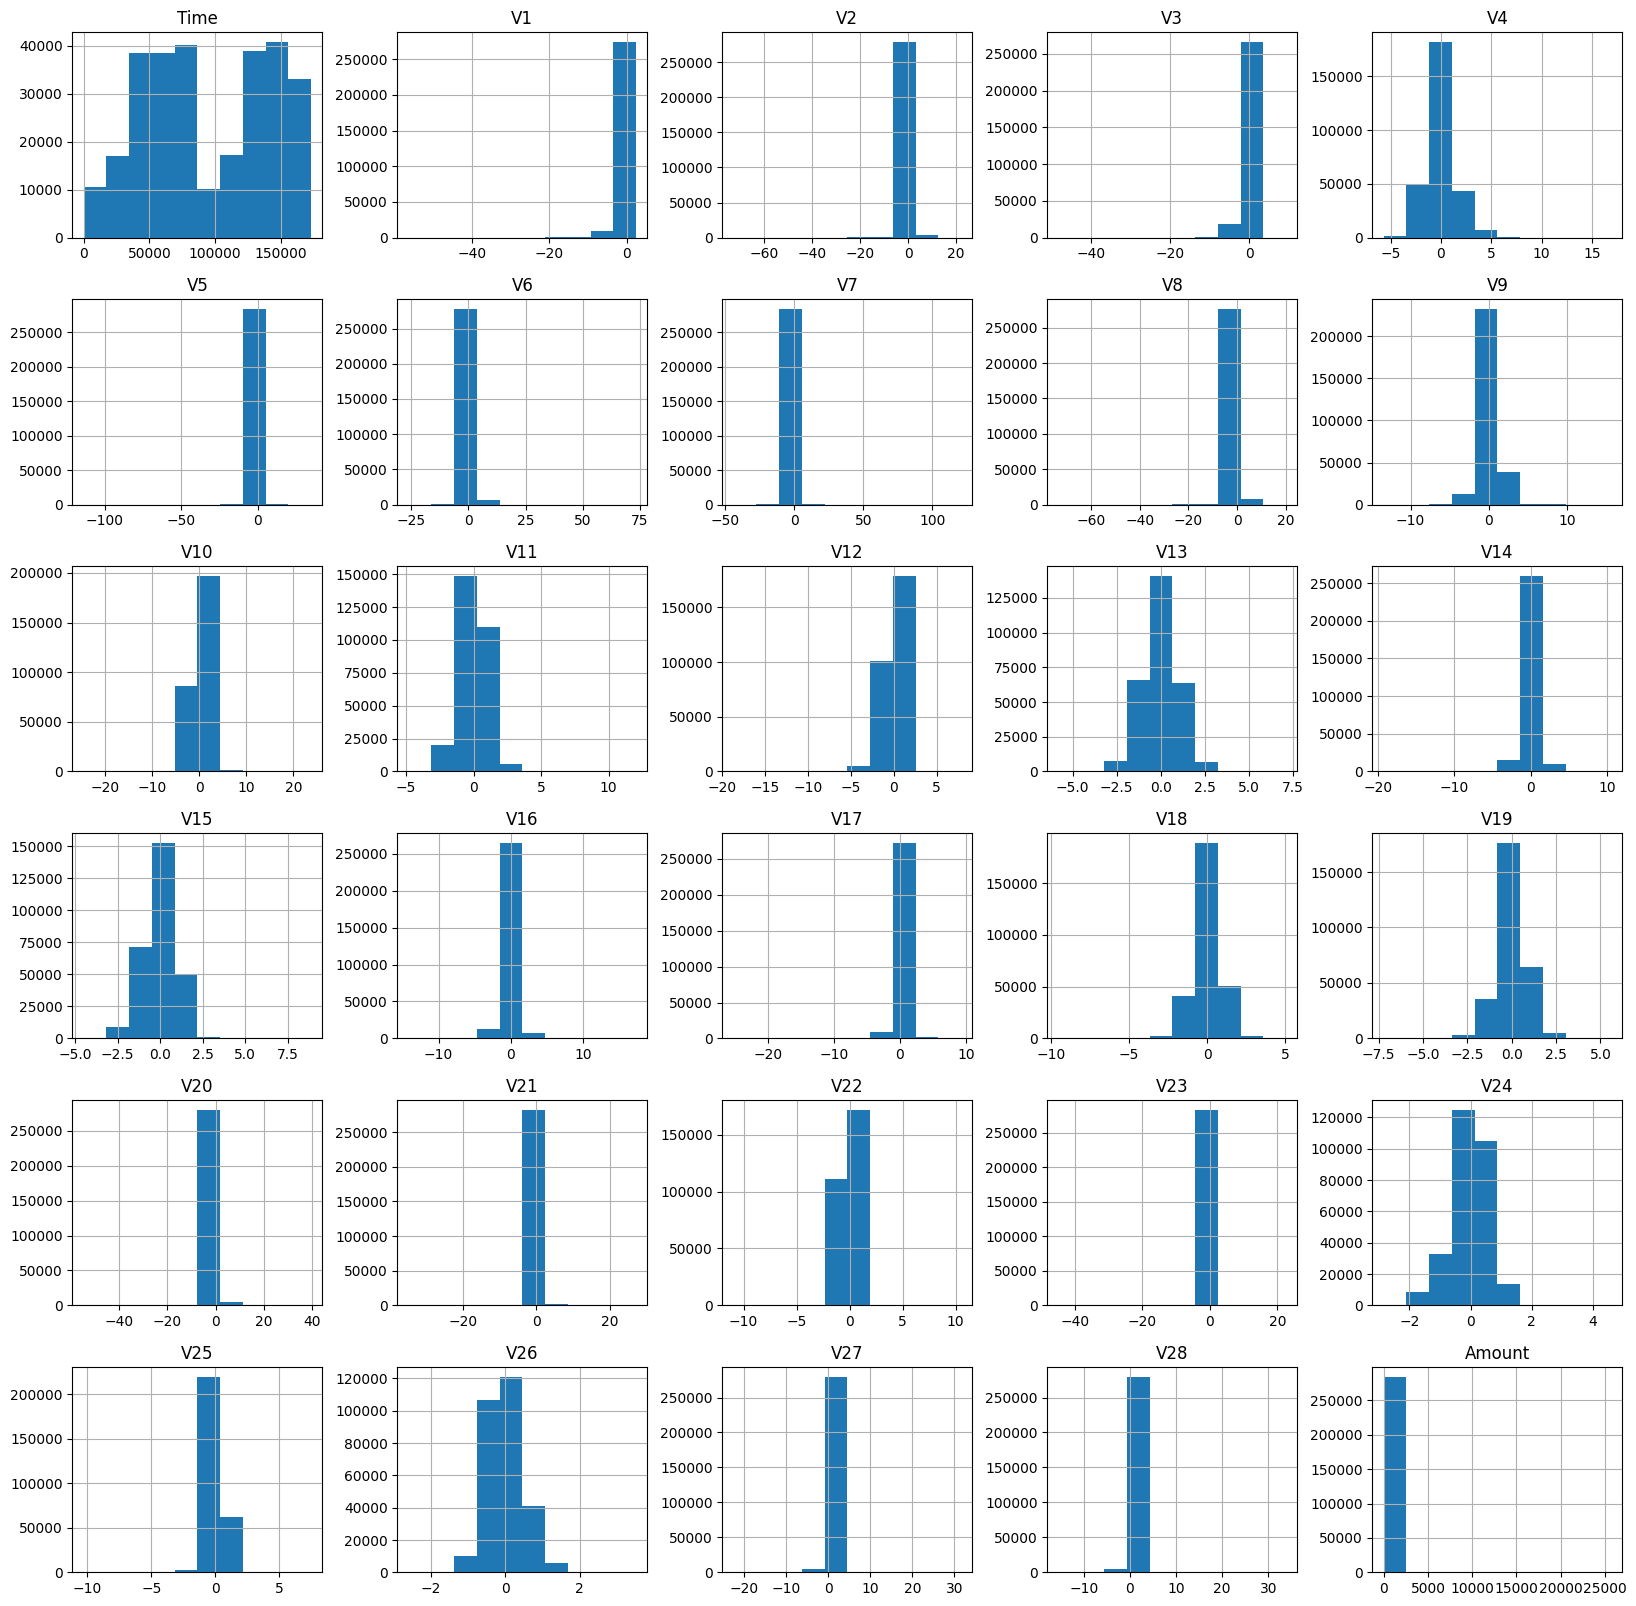

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

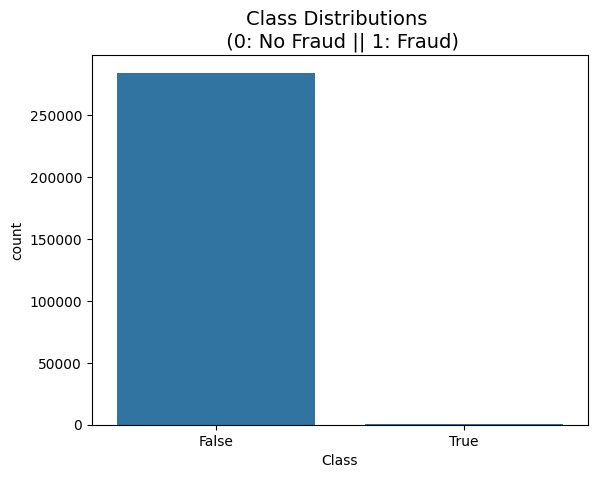

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# The distribution of all the features

data.hist(figsize=(20,20))
plt.show()




# The distribution of the target variable

sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)






In [4]:
# The distribution of the fraudulent and non-fraudulent transactions

fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

print('Fraud Cases: {}'.format(len(fraud)))
print('Non-Fraud Cases: {}'.format(len(non_fraud)))

outlier_fraction = len(fraud) / float(len(non_fraud))
print('Outlier Fraction: {}'.format(outlier_fraction))


Fraud Cases: 492
Non-Fraud Cases: 284315
Outlier Fraction: 0.0017304750013189597


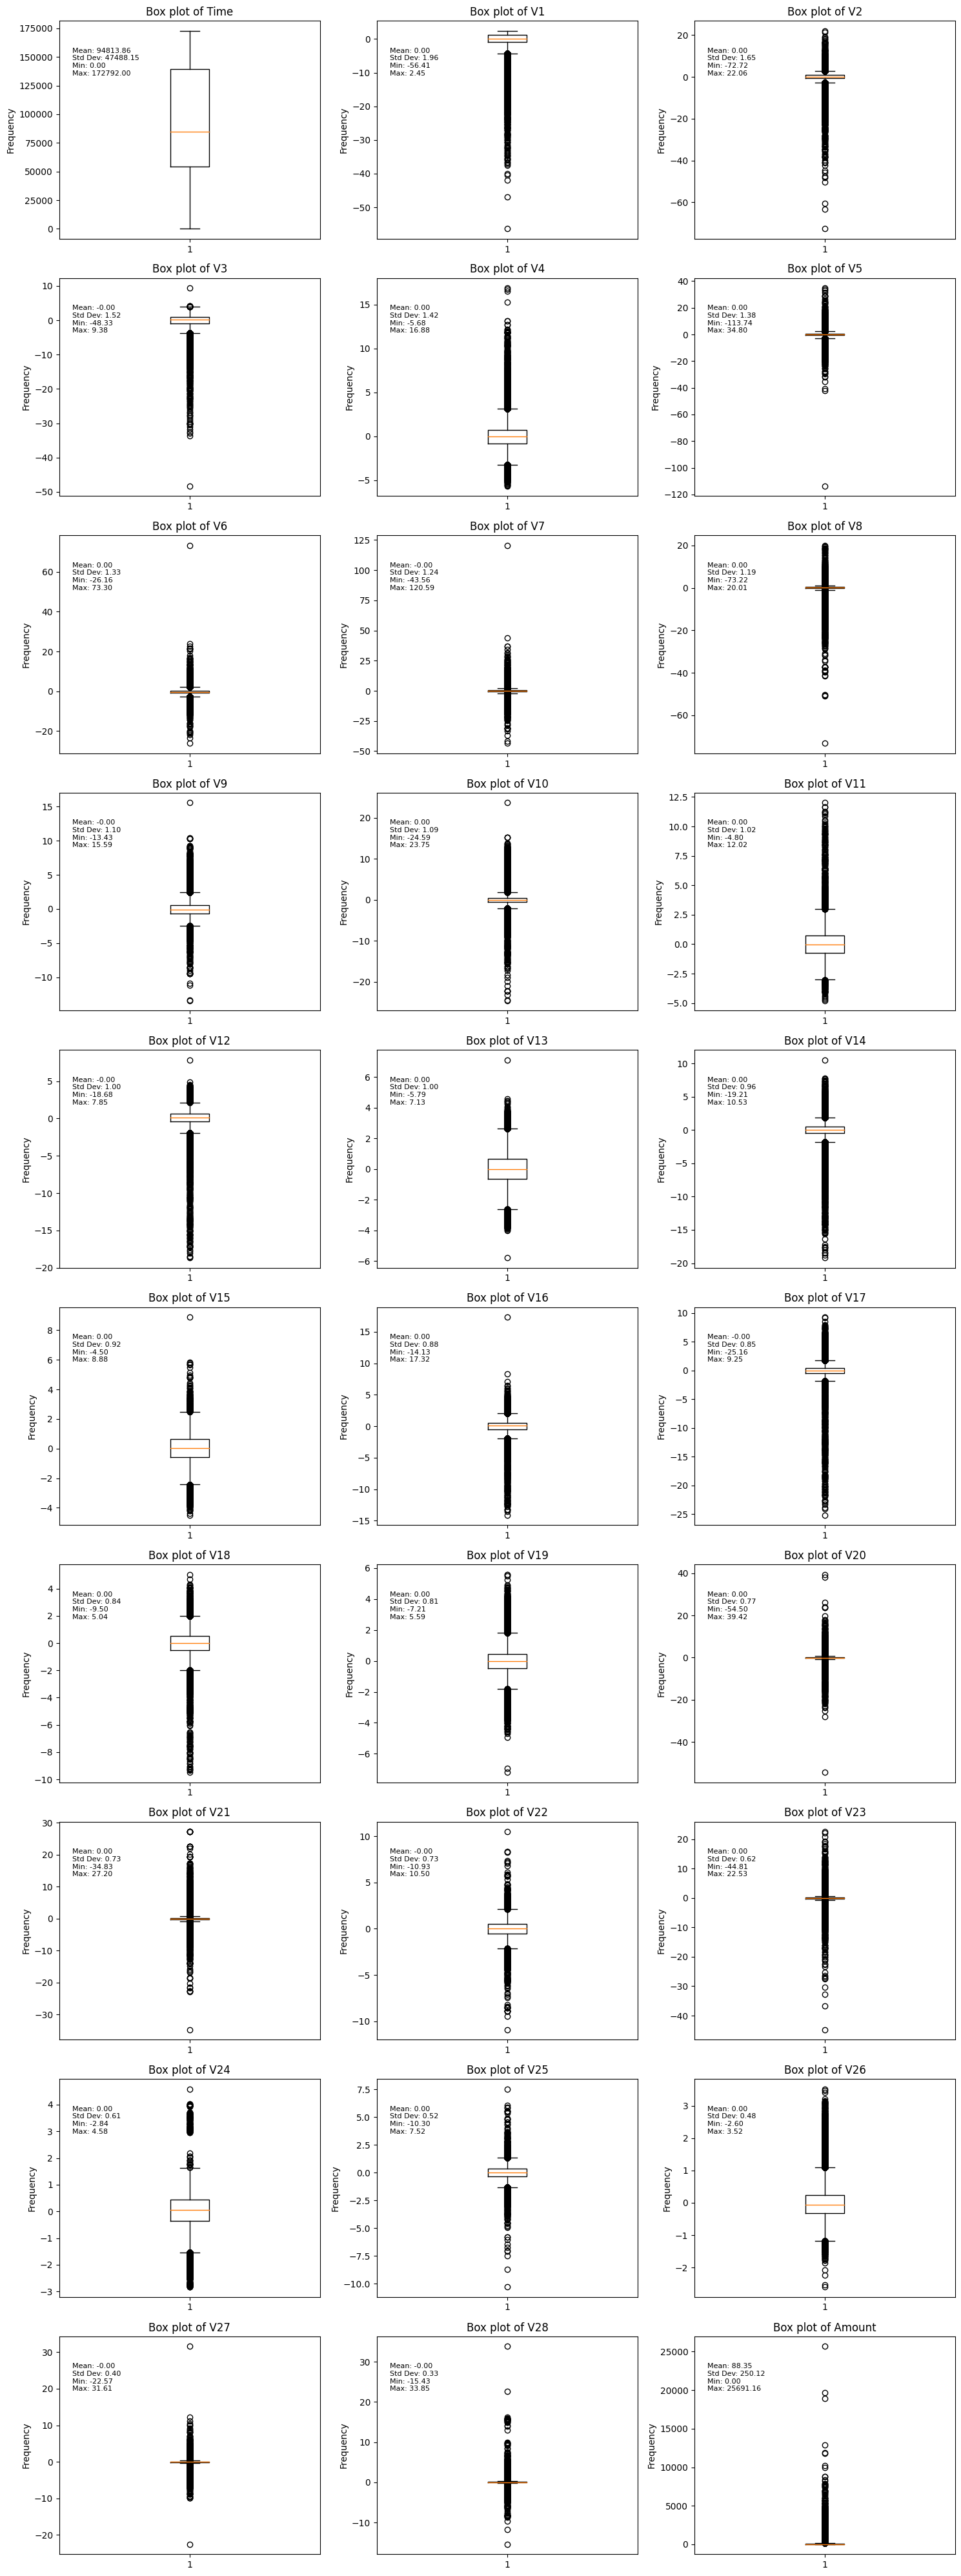

In [13]:
num_rows = (len(data.columns) // 3)
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))
axes = axes.flatten()
summary_stats = data.describe()

for i, col in enumerate(data.columns[ : -1]):
    axes[i].boxplot(data[col].dropna()) 
    axes[i].set_title('Box plot of ' + col)
    
    axes[i].set_ylabel('Frequency')
    stats_text = f"Mean: {summary_stats.loc['mean', col]:.2f}\nStd Dev: {summary_stats.loc['std', col]:.2f}\nMin: {summary_stats.loc['min', col]:.2f}\nMax: {summary_stats.loc['max', col]:.2f}"
    axes[i].annotate(stats_text, xy=(0.05, 0.75), xycoords='axes fraction', fontsize=8, color='black')

plt.tight_layout()
plt.show()

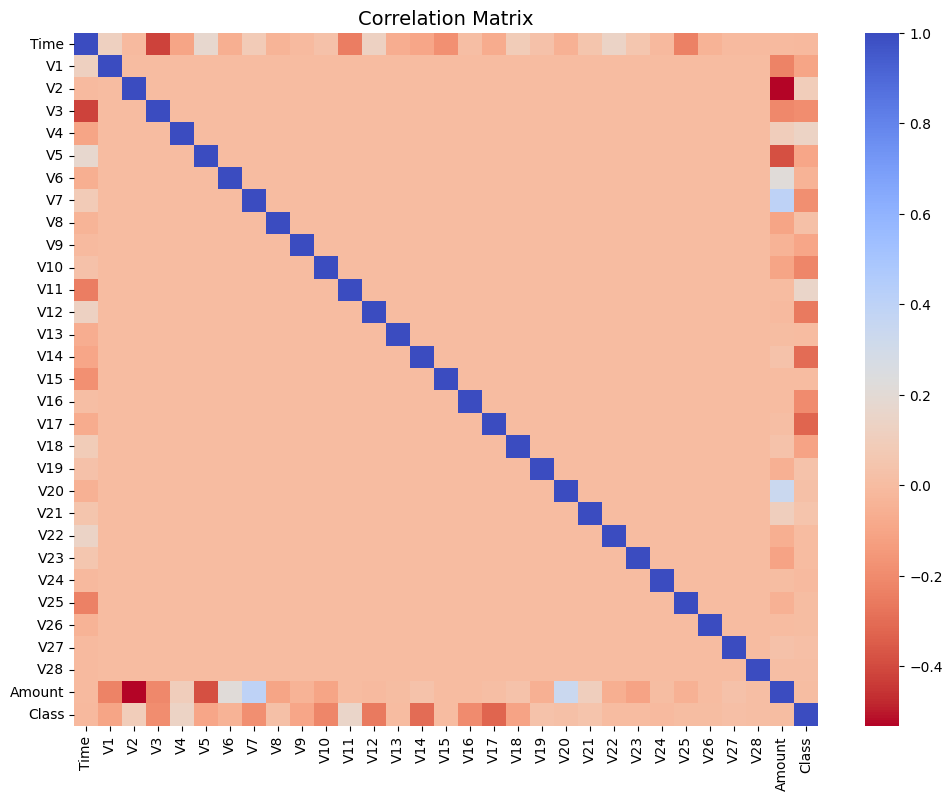

In [ ]:


# The correlation matrix

correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix', fontsize=14)
plt.show()



In [5]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
""" Train a decision tree classifier on the data and perform 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier. """


# Load the data
X = data.drop(['Class'], axis=1)
y = data['Class']

# Create a decision tree classifier
clf_best = DecisionTreeClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=10,
    min_samples_split=2,
    random_state=42
)
# Define the metrics to compute
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 10-fold cross-validation and compute all the scores
scores = cross_validate(clf_best , X, y, cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)

      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     5.441302    0.068308       0.997964        0.449438     0.816327   
1     5.990621    0.061146       0.998455        0.619048     0.265306   
2     6.149116    0.112127       0.999263        0.888889     0.653061   
3     7.252763    0.059321       0.999263        0.888889     0.653061   
4     6.285720    0.058176       0.999228        0.909091     0.612245   
5     6.711628    0.081751       0.998736        0.666667     0.560000   
6     5.119201    0.080369       0.999157        0.933333     0.560000   
7     5.274180    0.063707       0.999263        1.000000     0.571429   
8     5.466441    0.068504       0.999192        1.000000     0.530612   
9     6.040223    0.106376       0.999017        0.769231     0.612245   
Mean  5.973120    0.075978       0.998954        0.812459     0.583429   

       test_f1  
0     0.579710  
1     0.371429  
2     0.752941  
3     0.752941  
4     0.731707  
5     0.6

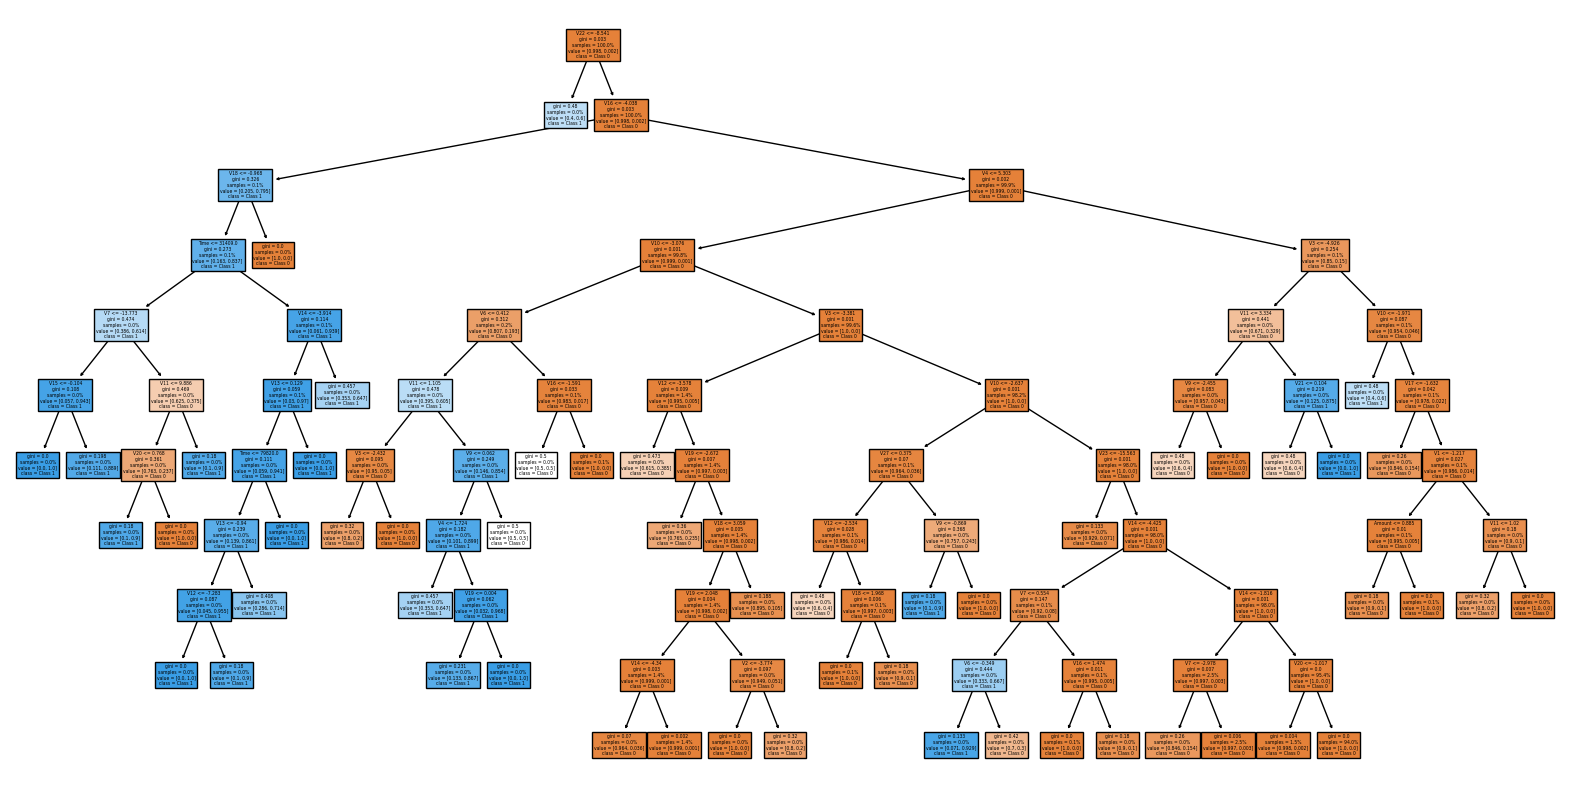

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the model to the data
clf_best.fit(X, y)

# Plot the tree
plt.figure(figsize=(20,10))  # Set the figure size (optional)
plot_tree(clf_best, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], proportion=True)
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\PC-1\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score:  0.9989536795474532


In [7]:
"""training a DT modele with data oversampled with random oversampling performin 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import RandomOverSampler


# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Fit the RandomOverSampler to the training data
X_resampled_Rand, y_resampled_Rand = ros.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_Rand, y_resampled_Rand , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)



      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     9.747880    0.159012       0.657352        0.599030     0.951778   
1     8.286695    0.148649       0.974043        0.984297     0.963455   
2     6.642115    0.166149       0.971827        0.990027     0.953255   
3     7.209843    0.174222       0.973093        0.993614     0.952306   
4     7.055804    0.136404       0.975995        0.986974     0.964722   
5     6.694462    0.142647       0.978193        0.976117     0.980374   
6     6.212727    0.134199       0.972636        0.975749     0.969366   
7     6.166208    0.114636       0.971704        0.975299     0.967923   
8     6.027587    0.125178       0.974096        0.977708     0.970315   
9     6.004230    0.121846       0.971036        0.970556     0.971546   
Mean  7.004755    0.142294       0.941997        0.942937     0.964504   

       test_f1  
0     0.735286  
1     0.973765  
2     0.971293  
3     0.972522  
4     0.975721  
5     0.9

In [8]:


"""training a DT modele with data oversampled with SMOTE oversampling performin 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_SMOTE, y_resampled_SMOTE , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)




       fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     11.257817    0.144474       0.576878        0.542768     0.975555   
1      9.969114    0.124724       0.980462        0.983848     0.976962   
2     11.797673    0.185715       0.979934        0.985035     0.974676   
3     13.019022    0.112549       0.978264        0.992146     0.964159   
4     10.338197    0.127413       0.976874        0.978675     0.974992   
5     10.108600    0.119763       0.968292        0.974721     0.961522   
6     11.839356    0.124918       0.983451        0.989878     0.976892   
7     10.256144    0.113284       0.974078        0.986396     0.961417   
8     10.228029    0.098606       0.979020        0.987019     0.970808   
9     10.008653    0.131140       0.806359        0.728928     0.975485   
Mean  10.882260    0.128259       0.920361        0.914942     0.971247   

       test_f1  
0     0.697480  
1     0.980393  
2     0.979828  
3     0.977952  
4     0.976830

In [9]:
"""training a DT modele with data oversampled with ADASYN oversampling performing 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import ADASYN

# Create a ADASYN object
adasyn = ADASYN(random_state=42)


# Fit the ADASYN object to the training data

X_resampled_ADASYN, y_resampled_ADASYN = adasyn.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_ADASYN, y_resampled_ADASYN , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability
scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score
scores_df.loc['Mean'] = scores_df.mean()

# Print the scores
print(scores_df)




       fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     10.820037    0.100040       0.744715        0.668794     0.969574   
1      9.439361    0.098204       0.973005        0.987989     0.957650   
2      9.197577    0.136621       0.980409        0.988728     0.971896   
3      9.157726    0.125992       0.917852        0.987484     0.846424   
4      9.491309    0.115979       0.936793        0.989862     0.882620   
5     11.539942    0.118473       0.904996        0.947041     0.857967   
6     11.147269    0.124946       0.956561        0.979179     0.932958   
7     10.888172    0.153979       0.951003        0.984105     0.916813   
8     10.561938    0.159241       0.969311        0.985058     0.953078   
9     11.793426    0.144529       0.931183        0.993359     0.868167   
Mean  10.403676    0.127800       0.926583        0.951160     0.915715   

       test_f1  
0     0.791575  
1     0.972583  
2     0.980240  
3     0.911529  
4     0.933170

In [10]:
"""training a DT modele with data oversampled with Borderline oversampling performing 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""


from imblearn.over_sampling import BorderlineSMOTE

# Create a BorderlineSMOTE object

borderline = BorderlineSMOTE(random_state=42)


# Fit the BorderlineSMOTE object to the training data

X_resampled_borderline, y_resampled_borderline = borderline.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_borderline, y_resampled_borderline , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability


scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score

scores_df.loc['Mean'] = scores_df.mean()

# Print the scores  

print(scores_df)







       fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     10.224235    0.126275       0.958936        0.927075     0.996237   
1     11.025432    0.152217       0.999050        0.999121     0.998980   
2     10.710583    0.129555       0.998804        0.999507     0.998101   
3     13.413970    0.179731       0.998312        0.999330     0.997292   
4     13.620356    0.206321       0.997186        0.996278     0.998101   
5     12.944272    0.129812       0.996360        0.994707     0.998030   
6     10.950352    0.102803       0.998892        0.999577     0.998206   
7     12.047546    0.108659       0.998277        0.999084     0.997468   
8     12.987871    0.145833       0.999367        0.999191     0.999543   
9     13.839682    0.151213       0.998874        0.998769     0.998980   
Mean  12.176430    0.143242       0.994406        0.991264     0.998094   

       test_f1  
0     0.960412  
1     0.999050  
2     0.998803  
3     0.998310  
4     0.997189

In [18]:
"""training a DT modele with data oversampled with SVMSMOTE oversampling performing 10-fold cross-validation to compute the accuracy, precision, recall, and F1 score of the classifier."""

from imblearn.over_sampling import SVMSMOTE

# Create a SVMSMOTE object

svm_smote = SVMSMOTE(random_state=42)

# Fit the SVMSMOTE object to the training data

X_resampled_svm, y_resampled_svm = svm_smote.fit_resample(X, y)

# 10 Fold Cross Validation

scores = cross_validate(clf_best , X_resampled_svm, y_resampled_svm , cv=10, scoring=scoring)

# Convert the scores into a DataFrame for better readability

scores_df = pd.DataFrame(scores)

# Add a row for the mean of each score

scores_df.loc['Mean'] = scores_df.mean()

# Print the scores

print(scores_df)


      fit_time  score_time  test_accuracy  test_precision  test_recall  \
0     8.307185    0.104959       0.747604        0.666030     0.993247   
1     9.057732    0.096020       0.996694        0.997499     0.995885   
2     9.455660    0.140148       0.997169        0.999541     0.994794   
3     9.475236    0.133734       0.995076        0.997069     0.993071   
4     8.812624    0.136070       0.998118        0.999365     0.996870   
5     9.393423    0.133840       0.997520        0.996595     0.998452   
6     8.638257    0.101522       0.999683        0.999367     1.000000   
7     9.533293    0.120060       0.999033        0.998069     1.000000   
8     9.057242    0.094698       0.999138        0.998280     1.000000   
9     8.659787    0.112273       0.998804        0.997614     1.000000   
Mean  9.039044    0.117332       0.972884        0.964943     0.997232   

       test_f1  
0     0.797374  
1     0.996691  
2     0.997162  
3     0.995066  
4     0.998116  
5     0.9